# Load packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = "C:\\Users\\patri\\OneDrive\\1_Estudos\\19_Python\\dataset\\"
file = path + "diabetes_prediction_dataset.csv"
data = pd.read_csv(file)

# EDA - Exploratory Data Analysis

In [7]:
print(data.shape)
data.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Load function

In [39]:
def eda_numeric(vNumeric):
    fig, ax = plt.subplots()
    ax.hist(data[vNumeric][data["diabetes"]==0],bins=50,linewidth=0.5,label="no diabets")
    ax.hist(data[vNumeric][data["diabetes"]==1],bins=50,linewidth=0.5,label="yes diabets")
    plt.legend()
    vTitle = "Histogram of " + vNumeric + " by Diabetes"
    plt.title(vTitle)
    plt.show()

### Run function

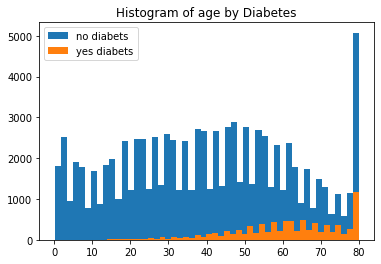

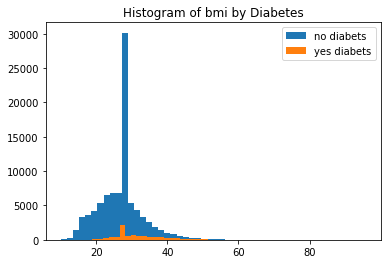

In [41]:
for i in ["age","bmi"]:
    eda_numeric(i)

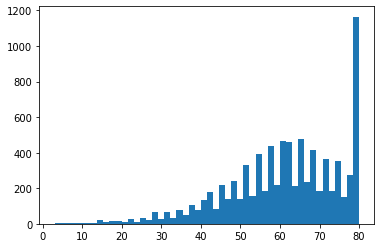

In [22]:
fig, ax = plt.subplots()
ax.hist(data["age"][data["diabetes"]==1],bins=50,linewidth=0.5)
plt.show()

# Encoding

In [72]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [60]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [58]:
data.dtypes.index[data.dtypes=="object"]

Index(['gender', 'smoking_history'], dtype='object')

In [61]:
y = data["diabetes"]
var_preditors = [x for x in data.columns if x != "diabetes"]
x = data[var_preditors]

In [75]:
var_obj = x.dtypes.index[x.dtypes=="object"]
var_num = x.dtypes.index[x.dtypes!="object"]
print(var_obj)
print(var_num)

Index(['gender', 'smoking_history'], dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')


In [73]:
column_transformer = make_column_transformer(
    (OneHotEncoder(),
    var_obj),
    remainder="passthrough")

In [77]:
column_transformer.fit_transform(x)

array([[  1.  ,   0.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  1.  ,   0.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  0.  ,   1.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  1.  ,   0.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  1.  ,   0.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [78]:
x_transformed = column_transformer.fit_transform(x)
print(x_transformed.shape)

(100000, 15)


# Split dataset

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.40, random_state=42)

# Feature Selection

In [90]:
column_names = column_transformer.get_feature_names_out()
df_encoding = pd.DataFrame({'variavel_categoria':column_names})
print(df_encoding.shape)

(15, 1)


In [93]:
%pip install boruta

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\patri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from boruta import BorutaPy

In [95]:
forest = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, random_state = 42)
forest.fit(x_train, y_train)

"""
define Boruta feature selection method
"""
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

x = x_test
y = y_test

"""
find all relevant features
"""
feat_selector.fit(x, y)

"""
call transform() on X to filter it down to selected features
"""
X_filtered = feat_selector.transform(x)

"""
zip my names, ranks, and decisions in a single iterable
"""
feature_ranks = list(zip(column_names, 
                            feat_selector.ranking_, 
                            feat_selector.support_))

feat_sel = pd.DataFrame({'var':column_names,'rank':feat_selector.ranking_,'support':feat_selector.support_})    
var_select = list(feat_sel[feat_sel['support']==True]['var'])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	0
Rejected: 	9


# Run models

## Gradient Boosting

## XGBoosting (squared error)

## XGBoosting (poisson)

# Check metrics